In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2]:
data_file = "conso.txt"

In [3]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [4]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [5]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


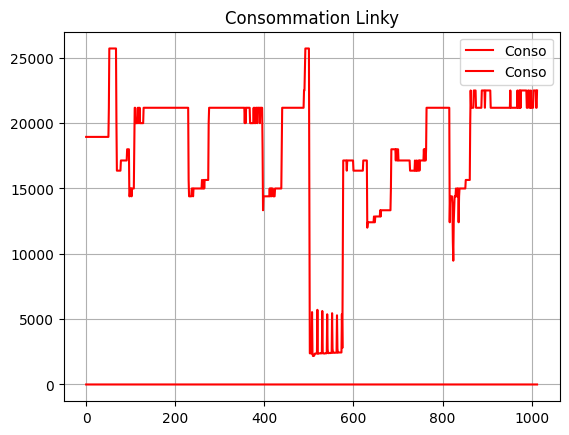

In [6]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [7]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [8]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26643 entries, 0 to 26642
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  26643 non-null  int64  
 1   kWh       26643 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 416.4 KB


In [9]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
26638,24542,0.15
26639,25131,0.14
26640,24689,0.14
26641,24228,0.15


In [10]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
26638,24542,0.15,24.542,146.687312,642734974
26639,25131,0.14,25.131,143.249373,642760105
26640,24689,0.14,24.689,145.813925,642784794
26641,24228,0.15,24.228,148.588410,642809022


In [11]:
# index dernier echantillon
l=len(conso_data)-1
l

26642

In [12]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

642832873000

In [13]:
old

False

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 23, 30, 619111)

In [15]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26643 entries, 0 to 26642
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   26643 non-null  int64         
 1   kWh        26643 non-null  float64       
 2   sec        26643 non-null  float64       
 3   Wh         26643 non-null  float64       
 4   cumul(ms)  26643 non-null  int64         
 5   dates      26643 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.2 MB


In [16]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:23:56.908111,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:23.151111,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:24:49.036111,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:14.790111,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:40.564111,07/03/2024
...,...,...,...,...,...,...,...
26638,24542,0.15,24.542,146.687312,642734974,2024-03-14 10:55:45.593111,14/03/2024
26639,25131,0.14,25.131,143.249373,642760105,2024-03-14 10:56:10.724111,14/03/2024
26640,24689,0.14,24.689,145.813925,642784794,2024-03-14 10:56:35.413111,14/03/2024
26641,24228,0.15,24.228,148.588410,642809022,2024-03-14 10:56:59.641111,14/03/2024


In [17]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:23:56.908111   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh  cumul(ms)  \
 26642     23851  0.15  23.851  150.937068  642832873   
 
                            dates        days  
 26642 2024-03-14 10:57:23.492111  14/03/2024  )

In [18]:
# tranche journalière
now = datetime.now()
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'14/03/2024'

In [19]:
#manuel
#day = '11/03/2024'

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

1327

In [20]:
conso_day.head(1).dates, conso_day.tail(1).dates

(25316   2024-03-14 00:00:04.271111
 Name: dates, dtype: datetime64[ns],
 26642   2024-03-14 10:57:23.492111
 Name: dates, dtype: datetime64[ns])

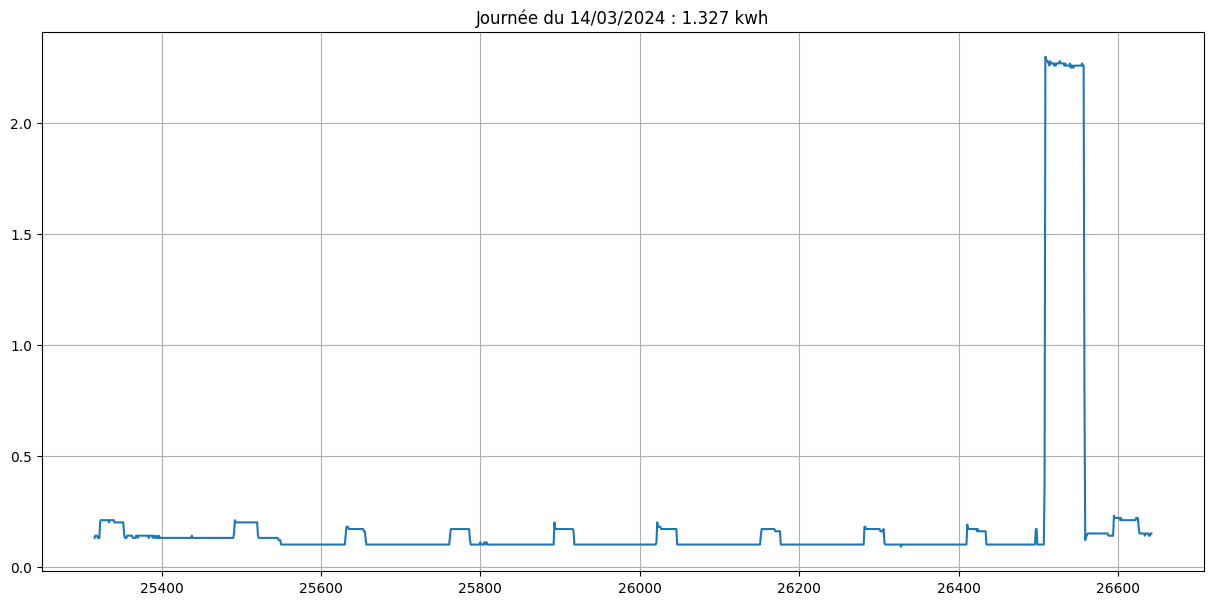

In [21]:
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [22]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

time = conso_data['dates']
time


0       2024-03-07 00:23:56.908111
1       2024-03-07 00:24:23.151111
2       2024-03-07 00:24:49.036111
3       2024-03-07 00:25:14.790111
4       2024-03-07 00:25:40.564111
                   ...            
26638   2024-03-14 10:55:45.593111
26639   2024-03-14 10:56:10.724111
26640   2024-03-14 10:56:35.413111
26641   2024-03-14 10:56:59.641111
26642   2024-03-14 10:57:23.492111
Name: dates, Length: 26643, dtype: datetime64[ns]

In [23]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [24]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [25]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

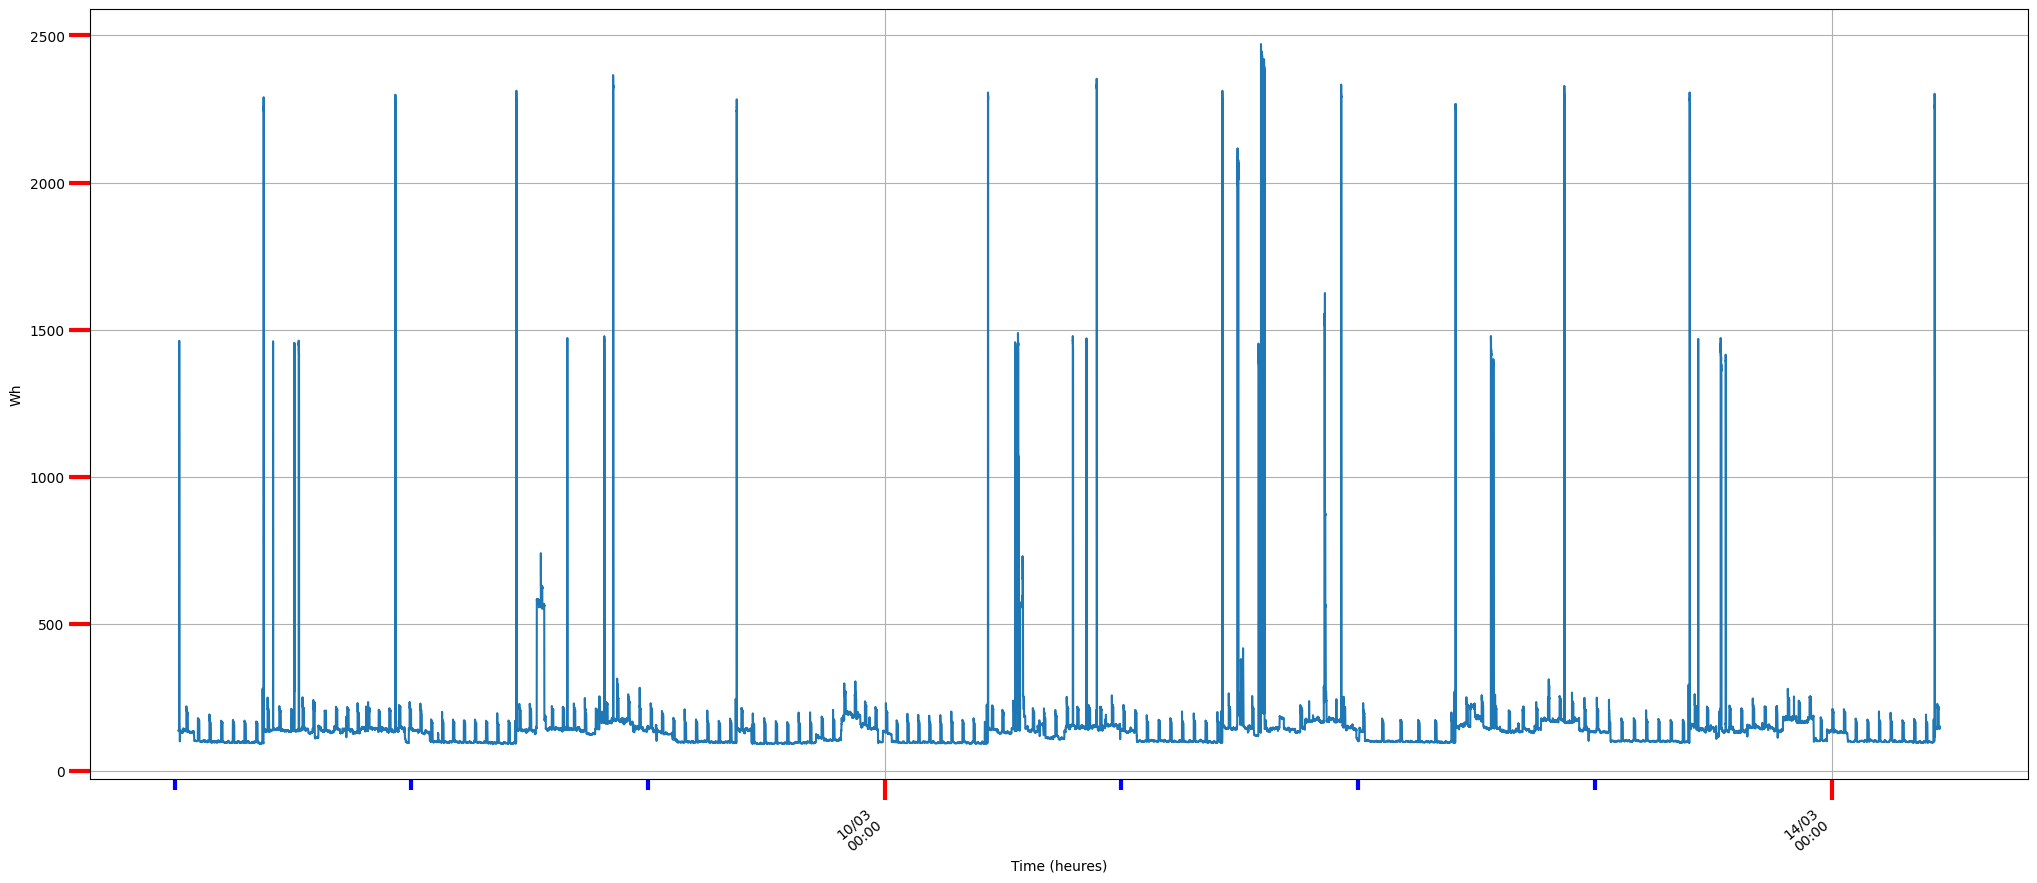

In [26]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [27]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
26642,23851,0.15,23.851,150.937068,642832873,2024-03-14 10:57:23.492111,14/03/2024


In [28]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

642832873000

# Slice of last 1 kWh

In [29]:
l = len(conso_data)  # total watt consommés
l

26643

In [30]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(26643, 1000)

In [31]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [32]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh  cumul(ms)  \
 25643     20977  0.17  20.977  171.616532  612325668   
 25644     21028  0.17  21.028  171.200304  612346696   
 25645     20984  0.17  20.984  171.559283  612367680   
 25646     21204  0.17  21.204  169.779287  612388884   
 25647     21516  0.17  21.516  167.317345  612410400   
 ...         ...   ...     ...         ...        ...   
 26638     24542  0.15  24.542  146.687312  642734974   
 26639     25131  0.14  25.131  143.249373  642760105   
 26640     24689  0.14  24.689  145.813925  642784794   
 26641     24228  0.15  24.228  148.588410  642809022   
 26642     23851  0.15  23.851  150.937068  642832873   
 
                            dates        days  
 25643 2024-03-14 02:28:56.287111  14/03/2024  
 25644 2024-03-14 02:29:17.315111  14/03/2024  
 25645 2024-03-14 02:29:38.299111  14/03/2024  
 25646 2024-03-14 02:29:59.503111  14/03/2024  
 25647 2024-03-14 02:30:21.019111  14/03/2024  
 ...               

In [33]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [34]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [35]:
cumtime_end,cumtime_start

(642832873000, 612346696000)

In [36]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

30486177000

In [37]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 14, 10, 57, 25, 921334),
 datetime.datetime(2024, 3, 14, 2, 29, 19, 744334),
 '14/03/2024 10:57:23')

In [38]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:23:56.908111,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:23.151111,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:24:49.036111,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:14.790111,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:40.564111,07/03/2024
...,...,...,...,...,...,...,...
26638,24542,0.15,24.542,146.687312,642734974,2024-03-14 10:55:45.593111,14/03/2024
26639,25131,0.14,25.131,143.249373,642760105,2024-03-14 10:56:10.724111,14/03/2024
26640,24689,0.14,24.689,145.813925,642784794,2024-03-14 10:56:35.413111,14/03/2024
26641,24228,0.15,24.228,148.588410,642809022,2024-03-14 10:56:59.641111,14/03/2024


In [39]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('14/03/2024 02:29:17', '14/03/2024 10:57:23')

In [40]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-14 02:28:56.287111', '2024-03-14 10:57:23.492111')

In [41]:
k

1

In [42]:
data.Interval.tail(1000)

25643    20977
25644    21028
25645    20984
25646    21204
25647    21516
         ...  
26638    24542
26639    25131
26640    24689
26641    24228
26642    23851
Name: Interval, Length: 1000, dtype: int64

In [43]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.480050555555557, 2.830171806496698, 8, 28, 48)

In [44]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_23764\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [45]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
25643,20977,0.17,20.977,171.616532,612325668,2024-03-14 02:28:56.287111,14/03/2024,2024-03-14 02:28:56.287111
25644,21028,0.17,21.028,171.200304,612346696,2024-03-14 02:29:17.315111,14/03/2024,2024-03-14 02:29:17.315111
25645,20984,0.17,20.984,171.559283,612367680,2024-03-14 02:29:38.299111,14/03/2024,2024-03-14 02:29:38.299111
25646,21204,0.17,21.204,169.779287,612388884,2024-03-14 02:29:59.503111,14/03/2024,2024-03-14 02:29:59.503111
25647,21516,0.17,21.516,167.317345,612410400,2024-03-14 02:30:21.019111,14/03/2024,2024-03-14 02:30:21.019111
...,...,...,...,...,...,...,...,...
26638,24542,0.15,24.542,146.687312,642734974,2024-03-14 10:55:45.593111,14/03/2024,2024-03-14 10:55:45.593111
26639,25131,0.14,25.131,143.249373,642760105,2024-03-14 10:56:10.724111,14/03/2024,2024-03-14 10:56:10.724111
26640,24689,0.14,24.689,145.813925,642784794,2024-03-14 10:56:35.413111,14/03/2024,2024-03-14 10:56:35.413111
26641,24228,0.15,24.228,148.588410,642809022,2024-03-14 10:56:59.641111,14/03/2024,2024-03-14 10:56:59.641111


<Axes: >

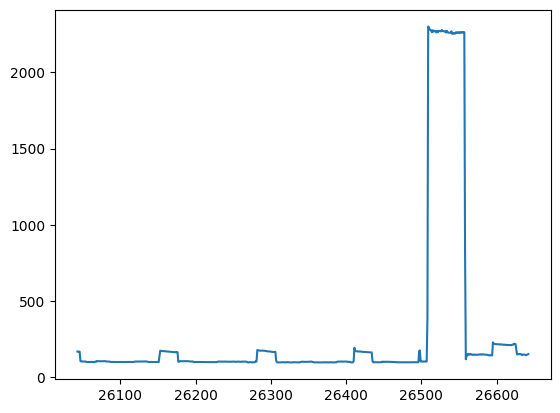

In [46]:
data.tail(600)['Wh'].plot()

In [47]:
data['Wh']

25643    171.616532
25644    171.200304
25645    171.559283
25646    169.779287
25647    167.317345
            ...    
26638    146.687312
26639    143.249373
26640    145.813925
26641    148.588410
26642    150.937068
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

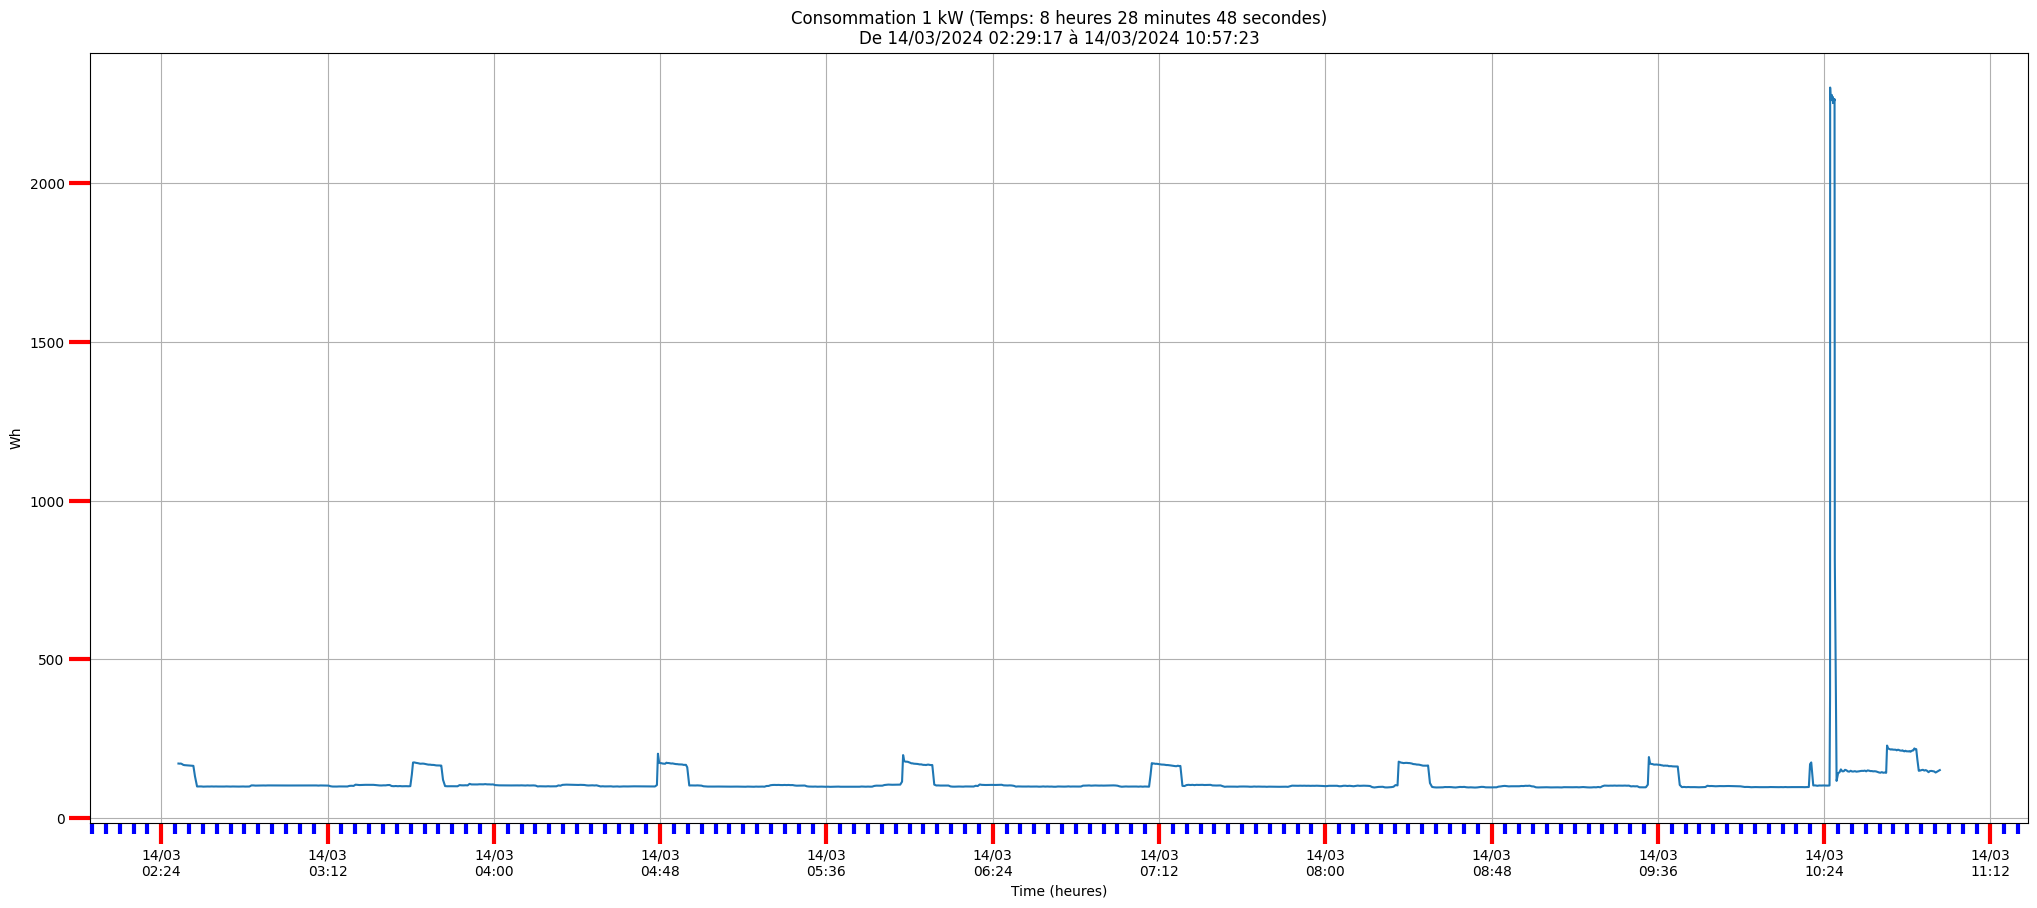

In [48]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

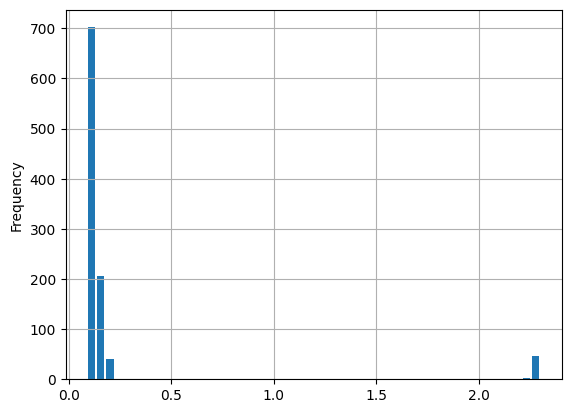

In [49]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [50]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
26638,24542,0.15,24.542,146.687312,642734974,2024-03-14 10:55:45.593111,14/03/2024
26639,25131,0.14,25.131,143.249373,642760105,2024-03-14 10:56:10.724111,14/03/2024
26640,24689,0.14,24.689,145.813925,642784794,2024-03-14 10:56:35.413111,14/03/2024
26641,24228,0.15,24.228,148.588410,642809022,2024-03-14 10:56:59.641111,14/03/2024
26642,23851,0.15,23.851,150.937068,642832873,2024-03-14 10:57:23.492111,14/03/2024


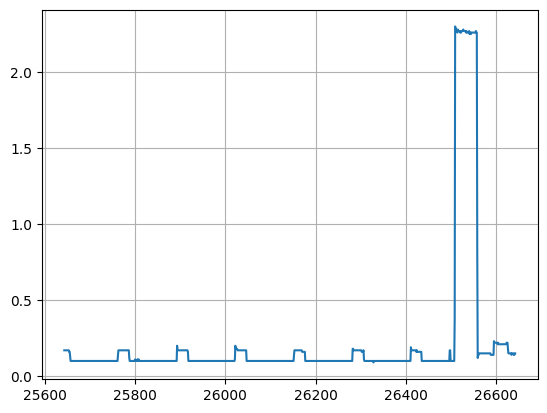

In [51]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [52]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(642832873000.0, 10713.881216666667)

In [53]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 14, 10, 57, 29, 583504),
 datetime.datetime(2024, 3, 7, 0, 23, 36, 710504))

In [54]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(26643, 642833, 178.56472222222223)

In [55]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [56]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [57]:
732/12 # 60 jours

61.0

In [58]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

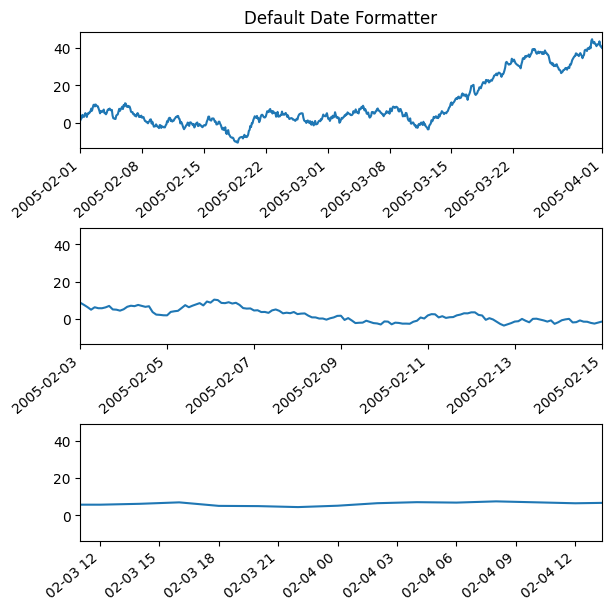

In [59]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [60]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)